In [21]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))

In [1]:
res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)
res.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/allresults.csv", row.names = 1)
res.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/allresults.csv", row.names = 1)

In [5]:
selftag_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.self_tagging.endodiff_donor_ref.txt"
selftag = read.csv(selftag_filename, sep = "\t", row.names = 1)

In [6]:
# retain only genes that are present more than once
dupl = selftag[selftag$feature %in% selftag$feature[duplicated(selftag$feature)],]
dim(selftag)
dim(dupl)

[1] 4824   31

[1] 2677   31

In [8]:
dupl = dupl[order(dupl$feature),]
head(dupl)

,beta.mean,beta_se,empirical_feature_p_value,p_value.mean,snp_id,feature,global_corr_p_value,snp_chromosome,snp_position,ref_allele,⋯,stage,sign.mean,stage_specific,p_value.int,q_value,beta.int,sign.int,GWAS_Variant,GWAS_Annotation,GWAS_LD
1105,-0.2962102,0.06745771,6.815066e-04,1.128044e-05,7_91764128_C_A,ENSG00000001630_CYP51A1,0.0092285559,7,91764128,C,⋯,mesendo,True,False,2.117326e-03,2.274699e-03,-9.196375e-04,True,{7_91764128};{7_91643402},{7_91764128_C_A:mesendo:ENSG00000001630_CYP51A1};{7_91643402_G_T:ips:ENSG00000001630_CYP51A1},{1.0};{0.5915537531854735}
3652,-0.1922148,0.06100889,2.122657e-02,1.629340e-03,7_91643402_G_T,ENSG00000001630_CYP51A1,0.0946862109,7,91643402,G,⋯,ips,True,False,NA,NA,NA,,{7_91764128};{7_91643402},{7_91764128_C_A:mesendo:ENSG00000001630_CYP51A1};{7_91643402_G_T:ips:ENSG00000001630_CYP51A1},{0.5915537531854735};{0.9999999999999999}
3383,0.4542769,0.10175926,4.998896e-03,8.035653e-06,12_1058688_A_C,ENSG00000002016_RAD52,0.0343612783,12,1058688,A,⋯,ips,True,False,9.554530e-01,3.289896e-01,-1.863243e-05,False,{12_1058688},{12_1058688_A_C:ips:ENSG00000002016_RAD52},{0.9999999999999998}
4009,0.4526755,0.10683039,1.917074e-03,2.261946e-05,12_1021159_C_T,ENSG00000002016_RAD52,0.0203119606,12,1021159,C,⋯,mesendo,True,False,NA,NA,NA,,{12_1021159},{12_1021159_C_T:mesendo:ENSG00000002016_RAD52},{0.9999999999999998}
422,0.6751852,0.13803669,1.885308e-05,1.001488e-06,16_90063890_T_G,ENSG00000003249_DBNDD1,0.0006499914,16,90063890,T,⋯,defendo,True,False,2.242526e-08,6.468193e-08,2.419779e-03,True,{16_90100471};{16_90063890};{16_90026512},{16_90100471_T_C:mesendo:ENSG00000003249_DBNDD1};{16_90063890_T_G:defendo:ENSG00000003249_DBNDD1};{16_90026512_T_C:defendo:ENSG00000141013_GAS8},{0.5812049576028244};{0.9999999999999998};{0.3536498355245956}
4252,0.5177406,0.13384554,1.522025e-02,1.096440e-04,16_90100471_T_C,ENSG00000003249_DBNDD1,0.0811036063,16,90100471,T,⋯,mesendo,True,False,NA,NA,NA,,{16_90100471};{16_90063890},{16_90100471_T_C:mesendo:ENSG00000003249_DBNDD1};{16_90063890_T_G:defendo:ENSG00000003249_DBNDD1},{1.0};{0.5812049576028244}


In [9]:
dupl$eQTL = gsub("\\}","",gsub("\\{","",gsub(":ips:","-",gsub(":mesendo:","-",gsub(":defendo:","-",dupl$GWAS_Annotation)))))
head(dupl)

,beta.mean,beta_se,empirical_feature_p_value,p_value.mean,snp_id,feature,global_corr_p_value,snp_chromosome,snp_position,ref_allele,⋯,sign.mean,stage_specific,p_value.int,q_value,beta.int,sign.int,GWAS_Variant,GWAS_Annotation,GWAS_LD,eQTL
1105,-0.2962102,0.06745771,6.815066e-04,1.128044e-05,7_91764128_C_A,ENSG00000001630_CYP51A1,0.0092285559,7,91764128,C,⋯,True,False,2.117326e-03,2.274699e-03,-9.196375e-04,True,{7_91764128};{7_91643402},{7_91764128_C_A:mesendo:ENSG00000001630_CYP51A1};{7_91643402_G_T:ips:ENSG00000001630_CYP51A1},{1.0};{0.5915537531854735},7_91764128_C_A-ENSG00000001630_CYP51A1;7_91643402_G_T-ENSG00000001630_CYP51A1
3652,-0.1922148,0.06100889,2.122657e-02,1.629340e-03,7_91643402_G_T,ENSG00000001630_CYP51A1,0.0946862109,7,91643402,G,⋯,True,False,NA,NA,NA,,{7_91764128};{7_91643402},{7_91764128_C_A:mesendo:ENSG00000001630_CYP51A1};{7_91643402_G_T:ips:ENSG00000001630_CYP51A1},{0.5915537531854735};{0.9999999999999999},7_91764128_C_A-ENSG00000001630_CYP51A1;7_91643402_G_T-ENSG00000001630_CYP51A1
3383,0.4542769,0.10175926,4.998896e-03,8.035653e-06,12_1058688_A_C,ENSG00000002016_RAD52,0.0343612783,12,1058688,A,⋯,True,False,9.554530e-01,3.289896e-01,-1.863243e-05,False,{12_1058688},{12_1058688_A_C:ips:ENSG00000002016_RAD52},{0.9999999999999998},12_1058688_A_C-ENSG00000002016_RAD52
4009,0.4526755,0.10683039,1.917074e-03,2.261946e-05,12_1021159_C_T,ENSG00000002016_RAD52,0.0203119606,12,1021159,C,⋯,True,False,NA,NA,NA,,{12_1021159},{12_1021159_C_T:mesendo:ENSG00000002016_RAD52},{0.9999999999999998},12_1021159_C_T-ENSG00000002016_RAD52
422,0.6751852,0.13803669,1.885308e-05,1.001488e-06,16_90063890_T_G,ENSG00000003249_DBNDD1,0.0006499914,16,90063890,T,⋯,True,False,2.242526e-08,6.468193e-08,2.419779e-03,True,{16_90100471};{16_90063890};{16_90026512},{16_90100471_T_C:mesendo:ENSG00000003249_DBNDD1};{16_90063890_T_G:defendo:ENSG00000003249_DBNDD1};{16_90026512_T_C:defendo:ENSG00000141013_GAS8},{0.5812049576028244};{0.9999999999999998};{0.3536498355245956},16_90100471_T_C-ENSG00000003249_DBNDD1;16_90063890_T_G-ENSG00000003249_DBNDD1;16_90026512_T_C-ENSG00000141013_GAS8
4252,0.5177406,0.13384554,1.522025e-02,1.096440e-04,16_90100471_T_C,ENSG00000003249_DBNDD1,0.0811036063,16,90100471,T,⋯,True,False,NA,NA,NA,,{16_90100471};{16_90063890},{16_90100471_T_C:mesendo:ENSG00000003249_DBNDD1};{16_90063890_T_G:defendo:ENSG00000003249_DBNDD1},{1.0};{0.5812049576028244},16_90100471_T_C-ENSG00000003249_DBNDD1;16_90063890_T_G-ENSG00000003249_DBNDD1


In [11]:
dupl$lead.switch = "not_sure"

In [12]:
for(i in 1:length(unique(dupl$feature))){
#     print (i)
    gene = unique(dupl$feature)[i]
    res = dupl[dupl$feature == gene,]
    if(nrow(res) == 2 & res$snp_id[1] == res$snp_id[2]){
        dupl$lead.switch[dupl$feature == gene] <- "F"
    }
    if(nrow(res) == 3 & res$snp_id[1] == res$snp_id[2] & res$snp_id[1] == res$snp_id[3]){
        dupl$lead.switch[dupl$feature == gene] <- "F"
    }
}

In [13]:
dupl_diffsnps = dupl[dupl$lead.switch != "F",]
dim(dupl)
dim(dupl_diffsnps)

[1] 2677   33

[1] 2364   33

In [14]:
for(i in 1:length(unique(dupl_diffsnps$feature))){
#     print (i)
    gene = unique(dupl_diffsnps$feature)[i]
    res = dupl_diffsnps[dupl_diffsnps$feature == gene,]
    if(nrow(res) == 2 & 
       length(unlist(strsplit(res$eQTL[1],";"))) == 1 & 
       length(unlist(strsplit(res$eQTL[2],";"))) == 1){
#         print(res[,c("snp_id","feature","eQTL")])
        if(paste0(res[1,"snp_id"],"-",res[1,"feature"]) == res[1,"eQTL"] | 
          paste0(res[3,"snp_id"],"-",res[2,"feature"]) == res[2,"eQTL"]){
            
            dupl$lead.switch[dupl$feature == gene] <- "T"
        }
    }
    if(nrow(res) == 3 & 
       length(unlist(strsplit(res$eQTL[1],";"))) == 1 & 
       length(unlist(strsplit(res$eQTL[2],";"))) == 1 & 
       length(unlist(strsplit(res$eQTL[3],";"))) == 1){
#         print(res[,c("snp_id","feature","eQTL")])
        if(paste0(res[1,"snp_id"],"-",res[1,"feature"]) == res[1,"eQTL"] & 
          paste0(res[2,"snp_id"],"-",res[2,"feature"]) == res[2,"eQTL"] & 
          paste0(res[3,"snp_id"],"-",res[3,"feature"]) == res[3,"eQTL"]){
            
            dupl$lead.switch[dupl$feature == gene] <- "T"
        }
    }
}

In [15]:
lead_switches = dupl[dupl$lead.switch == "T",]
i = 33
gene = unique(lead_switches$feature)[i]
gene
gene_start = 8594387
gene_end = 8621488
res = lead_switches[lead_switches$feature == gene,]
res

[1] "ENSG00000109625_CPZ"

,beta.mean,beta_se,empirical_feature_p_value,p_value.mean,snp_id,feature,global_corr_p_value,snp_chromosome,snp_position,ref_allele,⋯,stage_specific,p_value.int,q_value,beta.int,sign.int,GWAS_Variant,GWAS_Annotation,GWAS_LD,eQTL,lead.switch
1400,-0.4600655,0.07959262,7.231291e-06,7.458801e-09,4_8599467_G_C,ENSG00000109625_CPZ,0.0001398848,4,8599467,G,⋯,False,0.01138638,0.009587609,0.0007773429,True,{4_8599467},{4_8599467_G_C:ips:ENSG00000109625_CPZ},{1.0},4_8599467_G_C-ENSG00000109625_CPZ,T
4565,0.3807979,0.07818398,7.051360e-04,1.112962e-06,4_8567600_T_A,ENSG00000109625_CPZ,0.0119957304,4,8567600,T,⋯,False,NA,NA,NA,,{4_8567600},{4_8567600_T_A:defendo:ENSG00000109625_CPZ},{0.9999999999999999},4_8567600_T_A-ENSG00000109625_CPZ,T


In [23]:
col_day0 = canva_pal("Pool party")(4)[1]
col_day1 = canva_pal("Pool party")(4)[2]
col_day2 = canva_pal("Pool party")(4)[3]
col_day3 = canva_pal("Pool party")(4)[4]

col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

In [40]:
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c(col_defendo,col_ips,col_mesendo)) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(-3,-log10(m)+0.2))
# p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = col_defendo, alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = col_mesendo, alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = col_ips, alpha = 0.4, size = 1)
p = p + geom_point(aes(x = res[res$stage == "defendo","snp_position"], 
                       y = -log10(res[res$stage == "defendo","p_value.mean"])), col = col_defendo, pch = 23, 
                   size = 3, fill = col_defendo, alpha = 0.6)
p = p + geom_point(aes(x = res[res$stage == "ips","snp_position"], 
                       y = -log10(res[res$stage == "ips","p_value.mean"])), col = col_ips, pch = 23, 
                   size = 3, fill = col_ips, alpha = 0.6)
p = p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = -0.7, ymax = -0.3), 
                  color = "black", alpha = 0.2, fill = "lightgrey")
# p = p + geom_rect(mapping = aes(xmin = min(df$pos), xmax = max(df$pos), ymin = -3, ymax = -1), 
#                   color = "white", fill = "gray89")
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "defendo","snp_position"]-3000, 
                                xmax = res[res$stage == "defendo","snp_position"]+3000, ymin = -1.5, ymax = -1.2), 
                  color = col_day3, fill = col_day3)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "defendo","snp_position"]-3000, 
                                xmax = res[res$stage == "defendo","snp_position"]+3000, ymin = -2, ymax = -1.7), 
                  color = col_day2, fill = col_day2)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "defendo","snp_position"]-3000, 
                                xmax = res[res$stage == "defendo","snp_position"]+3000, ymin = -2.5, ymax = -2.2), 
                  color = col_day1, fill = col_day1)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "defendo","snp_position"]-3000, 
                                xmax = res[res$stage == "defendo","snp_position"]+3000, ymin = -3, ymax = -2.7), 
                  color = col_day0, fill = col_day0)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "ips","snp_position"]-3000, 
                                xmax = res[res$stage == "ips","snp_position"]+3000, ymin = -2, ymax = -1.7), 
                  color = col_day2, fill = col_day2)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "ips","snp_position"]-3000, 
                                xmax = res[res$stage == "ips","snp_position"]+3000, ymin = -2.5, ymax = -2.2), 
                  color = col_day1, fill = col_day1)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "ips","snp_position"]-3000, 
                                xmax = res[res$stage == "ips","snp_position"]+3000, ymin = -3, ymax = -2.7), 
                  color = col_day0, fill = col_day0)
p <- p + annotate("text", x = gene_end + 13000, y = -0.5, label = "CPZ", col = "black", size = 6)
p <- p + annotate("text", x = res[res$stage == "defendo","snp_position"]-18000, y = -1.4, label = "day3", 
                  col = col_day3, size = 4.5)
p <- p + annotate("text", x = res[res$stage == "defendo","snp_position"]-18000, y = -1.9, label = "day2", 
                  col = col_day2, size = 4.5)
p <- p + annotate("text", x = res[res$stage == "defendo","snp_position"]-18000, y = -2.4, label = "day1", 
                  col = col_day1, size = 4.5)
p <- p + annotate("text", x = res[res$stage == "defendo","snp_position"]-18000, y = -2.9, label = "day0", 
                  col = col_day0, size = 4.5)
p <- p + annotate("text", x = res[res$stage == "ips","snp_position"]+60000, y = -2, label = "H3K4me1", 
                  col = "black", size = 5)

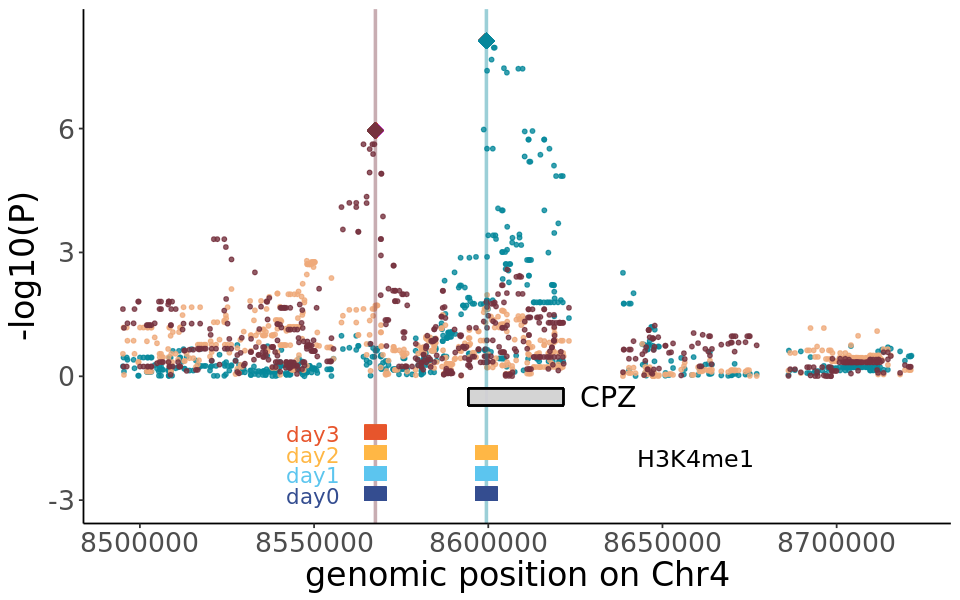

In [41]:
options(repr.plot.width = 8, repr.plot.height = 5)
p = p + theme_classic() 
p + theme(legend.position = "none", text = element_text(size = 20))
#                               axis.ticks.y = element_blank(), 
# #                               panel.border = element_rect(colour = "gray88", fill = NA, size = 0.75),
#                               panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "gray95"), 
#                               panel.grid.minor = element_line(size = 0.25, linetype = 'solid',colour = "gray88"))